In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [21]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [24]:
import seaborn as sns 
import statsmodels.api as sm
from sklearn import linear_model

In [25]:
df = pd.read_csv('StudentGrades.csv') 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
df.rename(columns = {'gender': 'sex',
                     'race/ethnicity' : 'ethnicity group',
                     'parental level of education' : 'education level'},
          inplace = True)

#df.rename() estamos remplazando el nombre de las columnas

df.head()

,sex,ethnicity group,education level,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
df.drop('lunch', axis =1)

,sex,ethnicity group,education level,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95
996,male,group C,high school,none,62,55,55
997,female,group C,high school,completed,59,71,65
998,female,group D,some college,completed,68,78,77


## Q1 Does education level have an effect on the scores? Get the median

In [28]:
pivot1=pd.pivot_table(df,
    index='education level',
    aggfunc='median',
    values=['math score','reading score','writing score'], margins=True,
)
pivot1

,math score,reading score,writing score
education level,,,
associate's degree,67.0,72.5,70.5
bachelor's degree,68.0,73.0,74.0
high school,63.0,66.0,64.0
master's degree,73.0,76.0,75.0
some college,67.5,70.5,70.0
some high school,65.0,67.0,66.0
All,66.0,70.0,69.0


In [29]:
pivot1=pivot1.drop(['All'], axis= 0)

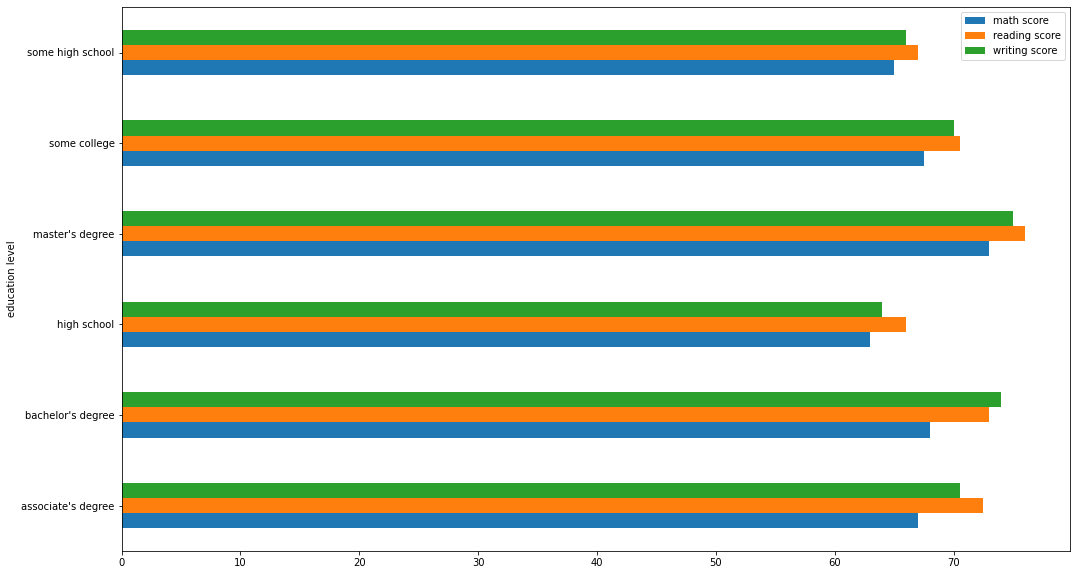

In [30]:
pivot1.plot(kind = 'barh', figsize = (17,10))

## Q2 Between

In [31]:
pivot2=pd.pivot_table(df,
                   index = 'sex',
                   aggfunc ='mean',
                   values=['writing score','reading score'],
                   margins = True,
                  )
pivot2

,reading score,writing score
sex,,
female,72.608108,72.467181
male,65.473029,63.311203
All,69.169000,68.054000


In [32]:
pivot2=pivot2.drop(['All'],axis = 0)

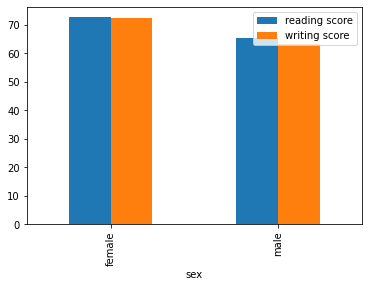

In [33]:
pivot2.plot(kind = 'bar')

## Q3 Does the ethnicity group have an effect on the score of math?

In [34]:
pivot3=pd.pivot_table(df,

    index='ethnicity group', 
    aggfunc='mean', 
    values=['math score'],
    margins=True,
    )

pivot3

,math score
ethnicity group,
group A,61.629213
group B,63.452632
group C,64.463950
group D,67.362595
group E,73.821429
All,66.089000


In [35]:
pivot3 = pivot3.drop(['All'], axis = 0)

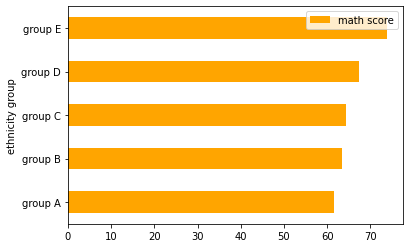

In [36]:
pivot3.plot(kind = 'barh', color = 'orange')

## Q4 Does a correlation exist between the most difficul sections of the exam? (Math and Reading)

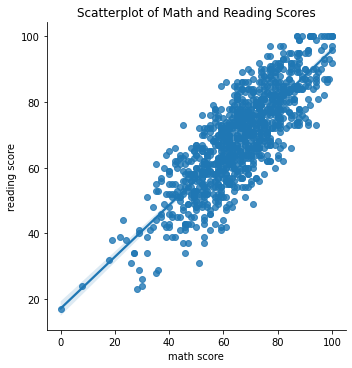

In [37]:
sns.lmplot(x= 'math score',
           y= 'reading score',
           data = df,)
plt.title('Scatterplot of Math and Reading Scores')
plt.show()

In [38]:
import statsmodels.api as sm 

## Q6 Range between all section scores:

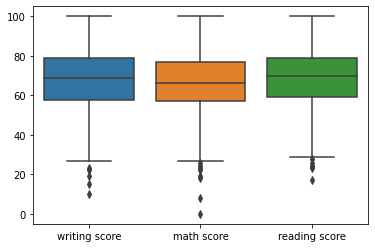

In [39]:
sns.boxplot(data = df.loc[:, ['writing score', 'math score', 'reading score']],
           )

## Q7 Using regression, analyze which is the impact of ethnicitygroup in the math section

In [40]:
df = df.rename(columns = {'math score': 'mathscore'})
df = df.rename(columns = {'ethnicity group': 'ethnicitygroup'})
df['ethnicitygroup'] = df.ethnicitygroup.replace({'group A':1,'group B':2, 'group C':3, 'group D':4,'group E':5})

df

,sex,ethnicitygroup,education level,lunch,test preparation course,mathscore,reading score,writing score
0,female,2,bachelor's degree,standard,none,72,72,74
1,female,3,some college,standard,completed,69,90,88
2,female,2,master's degree,standard,none,90,95,93
3,male,1,associate's degree,free/reduced,none,47,57,44
4,male,3,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,5,master's degree,standard,completed,88,99,95
996,male,3,high school,free/reduced,none,62,55,55
997,female,3,high school,free/reduced,completed,59,71,65
998,female,4,some college,standard,completed,68,78,77


In [41]:
modelA = sm.OLS.from_formula('mathscore ~ ethnicitygroup', data = df)
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mathscore   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     49.04
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           4.61e-12
Time:                        06:10:44   Log-Likelihood:                -4113.3
No. Observations:                1000   AIC:                             8231.
Df Residuals:                     998   BIC:                             8240.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         57.0882      1.368     41.731      0.000      54.404      59.773
ethnicitygroup     2.8358      0.405      7.003      0.000       2.041       3.630
==============================================================================
Omnibus:                       19.531   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.847
Skew:                          -0.306   Prob(JB):                     2.97e-05
Kurtosis:                       3.356   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

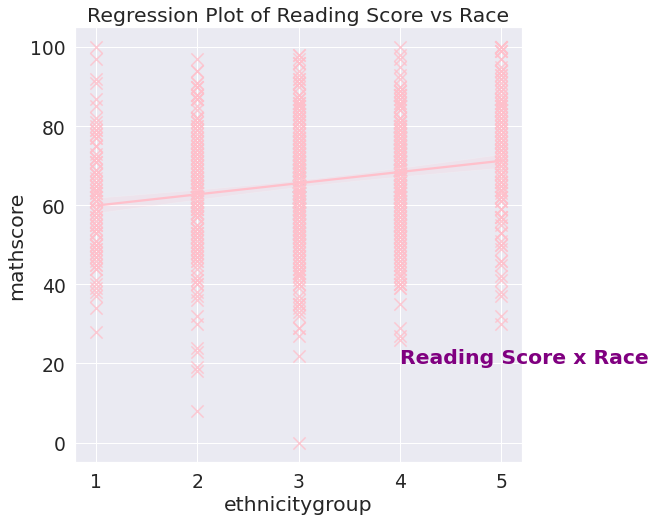

In [42]:
plt.figure(figsize = (8,8)) 
sns.set(font_scale = 1.7)
reg_plot = sns.regplot(x = 'ethnicitygroup', 
                        y = 'mathscore',
                        data = df,
                        marker = 'x',
                        color = 'pink', scatter_kws = {'s':150} 
                      )
reg_plot.set_title('Regression Plot of Reading Score vs Race') 
reg_plot.text(4, 20, 'Reading Score x Race',
                color = 'purple', 
                weight = 'semibold', 
                size = 'medium'
             )

plt.show()

In [56]:
mpl.style.use('ggplot')

In [57]:
counts = df['ethnicitygroup'].value_counts()

In [58]:
counts

3    319
4    262
2    190
5    140
1     89
Name: ethnicitygroup, dtype: int64

In [59]:
type (counts)
counts = counts.to_frame()
type (counts)

pandas.core.frame.DataFrame

In [60]:
counts['%'] = (counts.iloc[:,:]/counts.loc[:,'ethnicitygroup'].sum(axis=0))*100

In [61]:
counts

,ethnicitygroup,%
3,319,31.9
4,262,26.2
2,190,19.0
5,140,14.0
1,89,8.9


In [62]:
counts.columns

Index(['ethnicitygroup', '%'], dtype='object')

In [63]:
counts = counts.reset_index()
counts

,index,ethnicitygroup,%
0,3,319,31.9
1,4,262,26.2
2,2,190,19.0
3,5,140,14.0
4,1,89,8.9


In [64]:
counts=counts.rename({'index':'ethnicity_group'}, axis = 1)
counts

,ethnicity_group,ethnicitygroup,%
0,3,319,31.9
1,4,262,26.2
2,2,190,19.0
3,5,140,14.0
4,1,89,8.9


ValueError: 'explode' must be of length 'x'

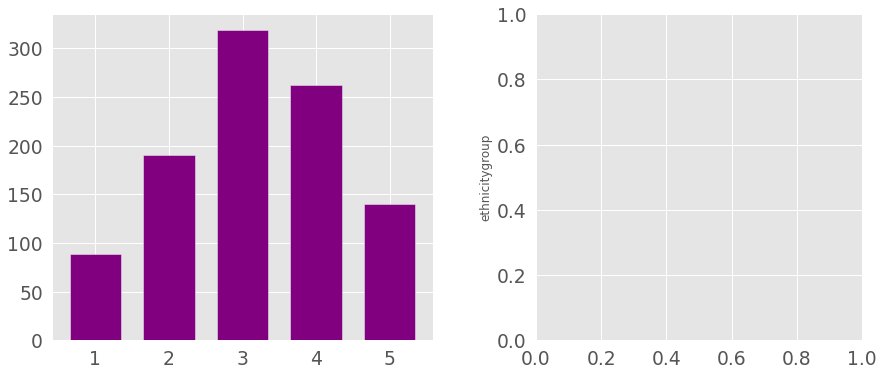

In [66]:
x = list(counts['ethnicity_group'])
y= list(counts ['ethnicitygroup'])

plt.subplot(1,2,1)
plt.rcParams['figure.figsize'] = (15,7)
plt.bar (x,y,width = 0.7, color = 'purple')
plt.subplot(1,2,2)
explode_list = [0.08,0.09,0.07,0.03]
color_list = ['gold', 'purple','coral','blue','green','pink']
counts['ethnicitygroup'].plot(kind = 'pie',
                         figsize = (15,6),
                         autopct = '%1.1f%%',
                         startangle = 90,
                         shadow = True,
                         labels = None,
                         explode = explode_list,
                         colors = color_list,
                         pctdistance = 1.1)
plt.show()